In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Question 1 #
d)

In [37]:
# Define matrix A and B
A = np.array([[1, 1], [1, -1]])
B = np.array([[2, -1], [-1, 3]])

# Calculate Hessian
H = np.matmul(A, B)

# Calculate eigenvalues and eigenvectors of Hessian
eigen_values, eigen_vectors = np.linalg.eig(H)

# Print the eigenvalues
print('Eigenvalues:', eigen_values)

# If statement to check all eigenvalues
# If they are non-negative then Hessian is positive semi-definite (convex)
if all(eigen_values >= 0):
    print('f(w) is a convex function.')
# If they are negative then the Hessian matrix is not positive semi-definite (not convex)
else:
    print('f(w) is not a convex function.')


Eigenvalues: [ 2. -5.]
f(w) is not a convex function.


# Question 2 #

a)

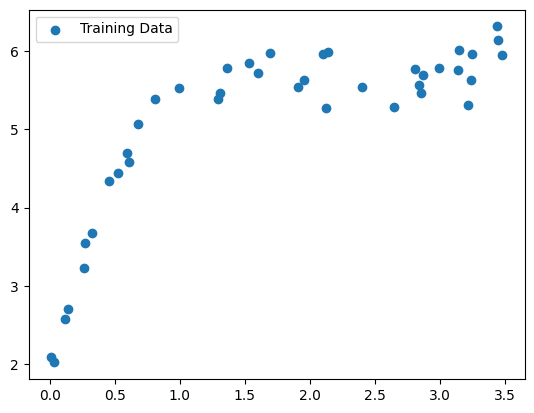

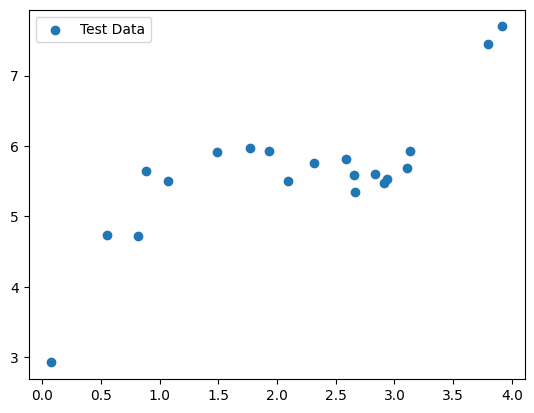

In [38]:
# load and plot training data
xtr = pd.read_csv('./data/hw1xtr.dat', header=None)
ytr = pd.read_csv('./data/hw1ytr.dat', header=None)
plt.scatter(xtr, ytr, label='Training Data')
plt.legend()
plt.show()

# load and plot test data
xte = pd.read_csv('./data/hw1xte.dat', header=None)
yte = pd.read_csv('./data/hw1yte.dat', header=None)
plt.scatter(xte, yte, label='Test Data')
plt.legend()
plt.show()

b)

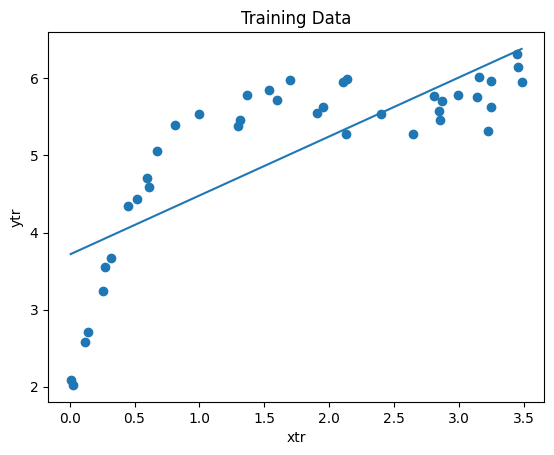

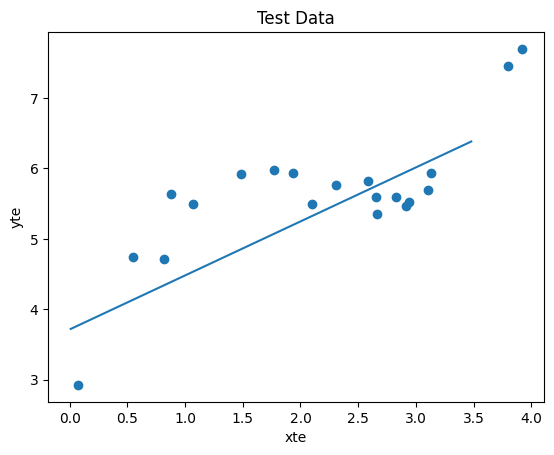

Average error on the training set: 0.5086
Average error on the test set: 0.4439


In [39]:
# Add a column of 1s to x train
xtrMatrix = np.c_[xtr, np.ones(xtr.shape[0])]

# Calculate weight factors using the given formula
factor1 = np.linalg.inv(np.dot(xtrMatrix.T, xtrMatrix))
ytrMatrix = ytr.to_numpy()
factor2 = np.dot(xtrMatrix.transpose(), ytrMatrix)
w = np.dot(factor1, factor2)

# Plot lines by generating x-grid
x_grid = np.linspace(xtr.min(), xtr.max(), 20)
y_pred = w[0] * x_grid + w[1]

# Plot the training data
fig, ax = plt.subplots()
plt.scatter(xtr, ytr)
plt.title('Training Data')
plt.xlabel('xtr')
plt.ylabel('ytr')
plt.plot(x_grid, y_pred)
plt.show()

# Plot the test data
fig, ax = plt.subplots()
plt.scatter(xte, yte)
plt.title('Test Data')
plt.xlabel('xte')
plt.ylabel('yte')
plt.plot(x_grid, y_pred)
plt.show()

# Get the train error
train_error = np.mean((ytrMatrix - np.dot(xtrMatrix, w)) ** 2)
rounded_train_error = round(train_error, 4)
print('Average error on the training set:', rounded_train_error)

# Get the test error
y_pred_test = w[0] * xte + w[1]
test_error = np.mean((yte.to_numpy() - y_pred_test) ** 2)
rounded_test_error = round(test_error, 4)
print('Average error on the test set:', rounded_test_error)

c)

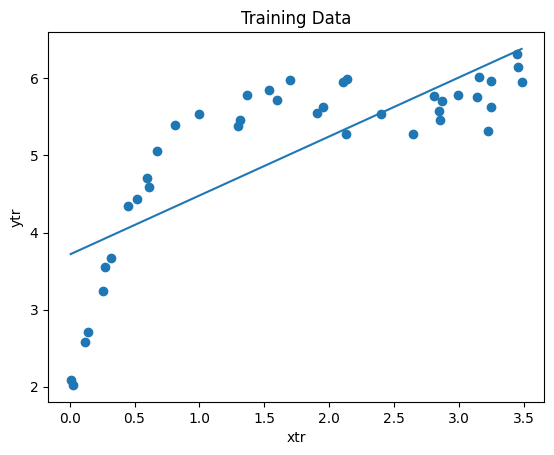

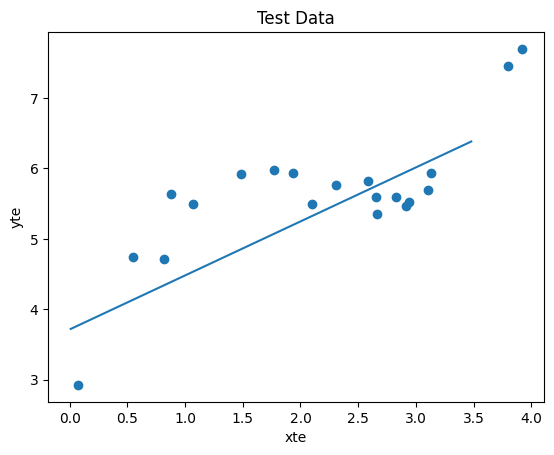

Average error on the training set: 0.5086
Average error on the test set: 1.983


In [40]:
# Add a column of ones to x train
xtrMatrix = np.c_[xtr, np.ones(xtr.shape[0])]

# Calculate weight factors using the given formula
factor1 = np.linalg.inv(np.dot(xtrMatrix.T, xtrMatrix))
ytrMatrix = ytr.to_numpy()
factor2 = np.dot(xtrMatrix.transpose(), ytrMatrix)
w = np.dot(factor1, factor2)

# Plot lines by generating x-grid
x_grid = np.linspace(xtr.min(), xtr.max(), 20)  # Max 20 since the other set is only 20 and you have to have the set sizes match
y_pred = w[0] * x_grid + w[1]

# Plot the training data
fig, ax = plt.subplots()
plt.scatter(xtr, ytr)
plt.title('Training Data')
plt.xlabel('xtr')
plt.ylabel('ytr')
plt.plot(x_grid, y_pred)
plt.show()

# Plot the test data
fig, ax = plt.subplots()
plt.scatter(xte, yte)
plt.title('Test Data')
plt.xlabel('xte')
plt.ylabel('yte')
plt.plot(x_grid, y_pred)
plt.show()

# Get the train error
train_error = np.mean((ytrMatrix - np.dot(xtrMatrix, w)) ** 2)
rounded_train_error = round(train_error, 4)
print('Average error on the training set:', rounded_train_error)

# Get the test error
test_error = np.mean((yte - y_pred) ** 2)
rounded_test_error = round(test_error, 4)
print('Average error on the test set:', rounded_test_error)

d)

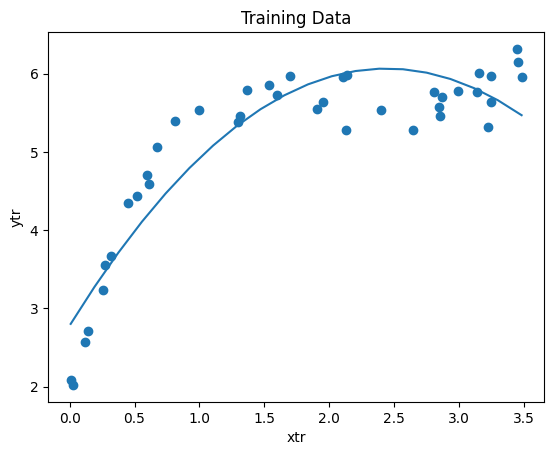

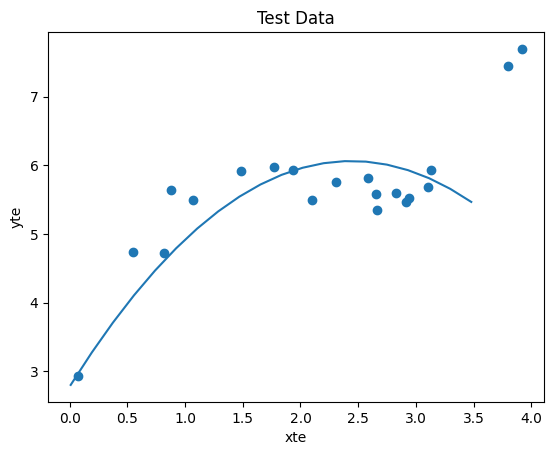

Average error on the training set: 0.201
Average error on the test set: 0.8533


In [41]:
# Calculate squared feature for training data
xtr_2 = xtr ** 2

# Concatenate features with a column of ones
xtrMatrix = np.c_[xtr, xtr_2, np.ones(xtr.shape[0])]

# Calculate weight factors using the given formula
factor1 = np.linalg.inv(np.dot(xtrMatrix.T, xtrMatrix))
ytrMatrix = ytr.to_numpy()
factor2 = np.dot(xtrMatrix.transpose(), ytrMatrix)
w = np.dot(factor1, factor2)

# Plot lines by generating x-grid
x_grid = np.linspace(xtr.min(), xtr.max(), 20)  # Max 20 since the other set is only 20 and you have to have the set sizes match
x_grid_2 = x_grid ** 2
y_pred = w[0] * x_grid + w[1] * x_grid_2 + w[2]

# Plot the training data
fig, ax = plt.subplots()
plt.scatter(xtr, ytr)
plt.title('Training Data')
plt.xlabel('xtr')
plt.ylabel('ytr')
plt.plot(x_grid, y_pred)
plt.show()

# Plot the test data
fig, ax = plt.subplots()
plt.scatter(xte, yte)
plt.title('Test Data')
plt.xlabel('xte')
plt.ylabel('yte')
plt.plot(x_grid, y_pred)
plt.show()

# Calculate train error
train_error = np.mean((ytrMatrix - np.dot(xtrMatrix, w)) ** 2)
rounded_train_error = round(train_error, 4)
print('Average error on the training set:', rounded_train_error)

# Calculate squared feature for test data
xte_2 = xte ** 2

# Concatenate features with a column of ones
xteMatrix = np.c_[xte, xte_2, np.ones(xte.shape[0])]

# Predict using test data
y_pred_test = np.dot(xteMatrix, w)

# Calculate test error
test_error = np.mean((yte - y_pred_test) ** 2)
rounded_test_error = round(test_error, 4)
print('Average error on the test set:', rounded_test_error)

e)

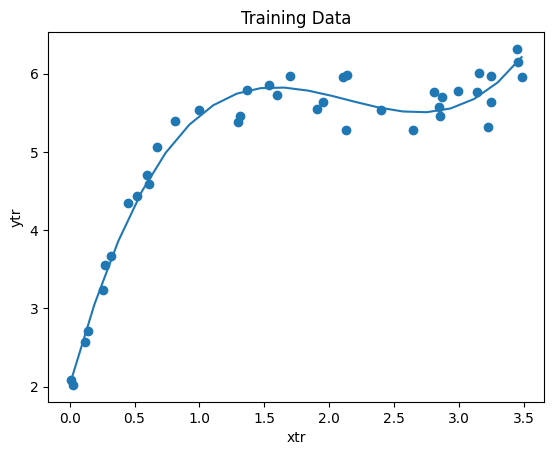

Average error on the training set: 0.0392


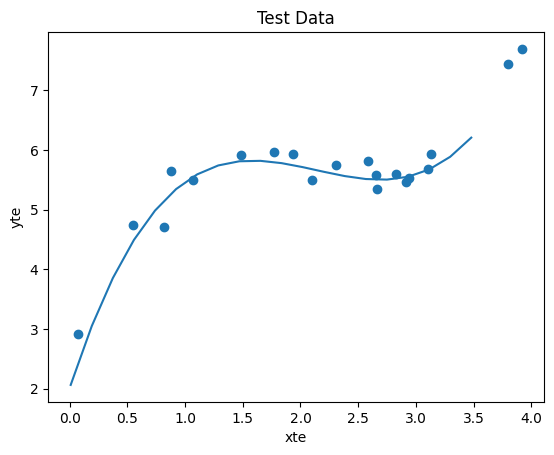

Average error on the test set: 2.1778


In [42]:
xtr_2 = xtr ** 2 
xtr_3 = xtr ** 3 

# using the given formula calculate weight factor 
xtrMatrix = np.c_[xtr, xtr_2, xtr_3, np.ones(xtr.shape[0])] 
factor1 = np.linalg.inv(np.dot(xtrMatrix.T, xtrMatrix)) 
ytrMatrix = ytr.to_numpy()
factor2 = np.dot(xtrMatrix.transpose(), ytrMatrix) 
w = np.dot(factor1, factor2) 

# plot lines by generating x-grid
x_grid = np.linspace(xtr.min(), xtr.max(),20)
x_grid_2 = x_grid ** 2 
x_grid_3 = x_grid ** 3 
y_pred = w[0] * x_grid + w[1] * x_grid_2 + w[2] * x_grid_3 + w[3] 


# plot the training data
fig, ax = plt.subplots()
plt.scatter(xtr, ytr) 
plt.title('Training Data')
plt.xlabel('xtr')
plt.ylabel('ytr')
plt.plot(x_grid, y_pred)
plt.show()

# get the train error
train_error = np.mean((ytrMatrix - np.dot(xtrMatrix, w)) ** 2)
rounded_train_error = round(train_error, 4)
print('Average error on the training set: ' + str(rounded_train_error))

# plot the test data
fig, ax = plt.subplots()
plt.scatter(xte, yte)
plt.title('Test Data')
plt.xlabel('xte')
plt.ylabel('yte')
plt.plot(x_grid, y_pred)
plt.show()

# get the test error
test_error = np.mean((yte - y_pred) ** 2)
rounded_test_error = round(test_error, 4)
print('Average error on the test set:', rounded_test_error)

f)

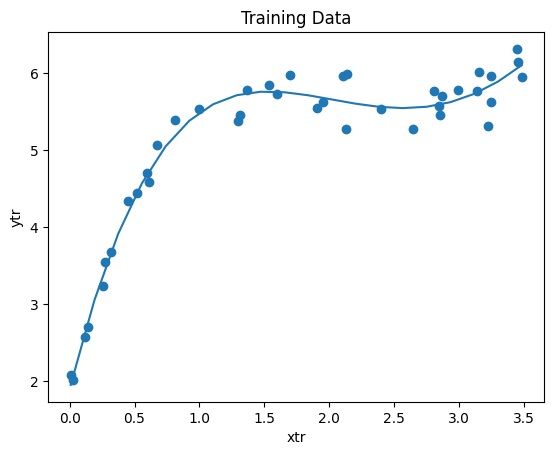

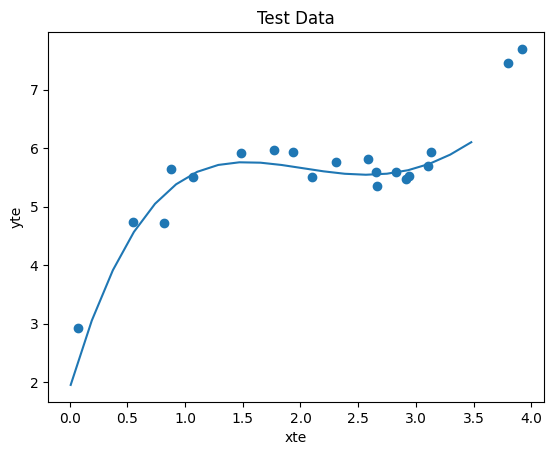

Average error on the training set: 0.0356
Average error on the test set: 0.1272


In [43]:
# Calculate polynomial features for training data
xtr_2 = xtr ** 2
xtr_3 = xtr ** 3
xtr_4 = xtr ** 4

# Concatenate polynomial features with a bias term
xtrMatrix = np.c_[xtr, xtr_2, xtr_3, xtr_4, np.ones(xtr.shape[0])]

# Calculate weight factors using the given formula
factor1 = np.linalg.inv(np.dot(xtrMatrix.T, xtrMatrix))
ytrMatrix = ytr.to_numpy()
factor2 = np.dot(xtrMatrix.transpose(), ytrMatrix)
w = np.dot(factor1, factor2)

# Plot lines by generating x-grid
x_grid = np.linspace(xtr.min(), xtr.max(), 20)
x_grid_2 = x_grid ** 2
x_grid_3 = x_grid ** 3
x_grid_4 = x_grid ** 4
y_pred = w[0] * x_grid + w[1] * x_grid_2 + w[2] * x_grid_3 + w[3] * x_grid_4 + w[4]

# Plot the training data
fig, ax = plt.subplots()
plt.scatter(xtr, ytr)
plt.title('Training Data')
plt.xlabel('xtr')
plt.ylabel('ytr')
plt.plot(x_grid, y_pred)
plt.show()

# Plot the test data
fig, ax = plt.subplots()
plt.scatter(xte, yte)
plt.title('Test Data')
plt.xlabel('xte')
plt.ylabel('yte')
plt.plot(x_grid, y_pred)
plt.show()

# Calculate the train error
train_error = np.mean((ytrMatrix - np.dot(xtrMatrix, w)) ** 2)
rounded_train_error = round(train_error, 4)
print('Average error on the training set:', rounded_train_error)

# Calculate the test error
y_pred_test = w[0] * xte + w[1] * xte ** 2 + w[2] * xte ** 3 + w[3] * xte ** 4 + w[4]
test_error = np.mean((yte.to_numpy() - y_pred_test) ** 2)
rounded_test_error = round(test_error, 4)
print('Average error on the test set:', rounded_test_error)

# Question 3 #
a)

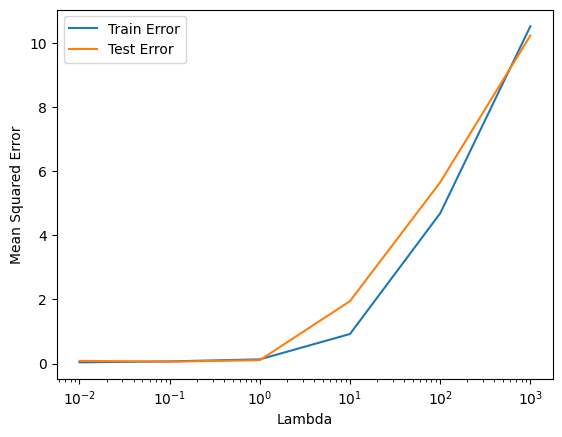

Best λ for fitting the training data: 0.01
Corresponding training error: 0.0373
Best λ for fitting the test data: 0.1
Corresponding test error: 0.0581


In [44]:
# Function for regularized 4th-order polynomial regression
def regularized_4th_order_polynomial_regression(xtr, ytr, xte, yte, lam):
    xtr_2 = xtr ** 2
    xtr_3 = xtr ** 3
    xtr_4 = xtr ** 4
    xtrMatrix = np.c_[xtr, xtr_2, xtr_3, xtr_4, np.ones(xtr.shape[0])]
    factor1 = np.linalg.inv(np.dot(xtrMatrix.T, xtrMatrix) + lam * np.eye(5))
    ytrMatrix = ytr.to_numpy()
    factor2 = np.dot(xtrMatrix.transpose(), ytrMatrix)
    w = np.dot(factor1, factor2)

    xte_2 = xte ** 2
    xte_3 = xte ** 3
    xte_4 = xte ** 4
    xteMatrix = np.c_[xte, xte_2, xte_3, xte_4, np.ones(xte.shape[0])]
    yteMatrix = yte.to_numpy()
    y_pred = np.dot(xteMatrix, w)

    train_error = np.mean((ytrMatrix - np.dot(xtrMatrix, w)) ** 2)
    test_error = np.mean((yteMatrix - y_pred) ** 2)

    return train_error, test_error, w

# Define lambda values
lambda_values = [0.01, 0.1, 1, 10, 100, 1000]

# Lists to store errors and weights
train_errors = []
test_errors = []
weights = []

# Loop through lambda values to calculate errors and weights
for lam in lambda_values:
    train_error, test_error, w = regularized_4th_order_polynomial_regression(xtr, ytr, xte, yte, lam)
    train_errors.append(train_error)
    test_errors.append(test_error)
    weights.append(w)

# Plot values
plt.semilogx(lambda_values, train_errors, label='Train Error')
plt.semilogx(lambda_values, test_errors, label='Test Error')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Find the best lambdas and corresponding errors
best_lambda_train = lambda_values[np.argmin(train_errors)]
best_lambda_test = lambda_values[np.argmin(test_errors)]

min_train_error = min(train_errors)
min_test_error = min(test_errors)

# Print results
print('Best λ for fitting the training data:', best_lambda_train)
print('Corresponding training error:', round(min_train_error, 4))
print('Best λ for fitting the test data:', best_lambda_test)
print('Corresponding test error:', round(min_test_error, 4))

b)

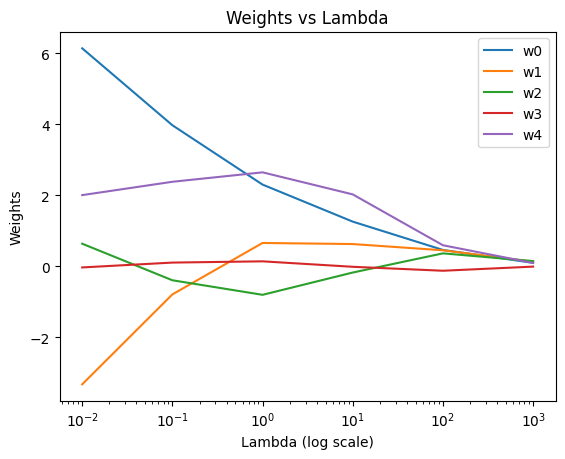

In [45]:
# plot each weight parameter
plt.semilogx(lambda_values, [w[0] for w in weights], label='w0')
plt.semilogx(lambda_values, [w[1] for w in weights], label='w1')
plt.semilogx(lambda_values, [w[2] for w in weights], label='w2')
plt.semilogx(lambda_values, [w[3] for w in weights], label='w3') 
plt.semilogx(lambda_values, [w[4] for w in weights], label='w4')
plt.legend()
plt.xlabel('Lambda (log scale)')
plt.ylabel('Weights')
plt.title('Weights vs Lambda')
plt.show()

c)

Best λ: 0.01
Minimum error: 0.048484945370068325


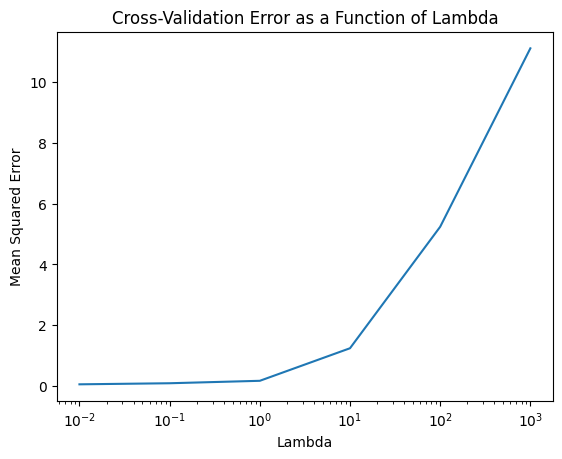

In [46]:
def k_fold_cross_validation(X, y, lambdas, k=5):
    kf = KFold(n_splits=k)
    errors = []
    for l in lambdas:
        error_sum = 0
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            xtr = X_train
            ytr = y_train

            xtr_2 = xtr ** 2
            xtr_3 = xtr ** 3
            xtr_4 = xtr ** 4

            xtrMatrix = np.c_[xtr, xtr_2, xtr_3, xtr_4, np.ones(xtr.shape[0])]
            factor1 = np.linalg.inv(np.dot(xtrMatrix.T, xtrMatrix) + l * np.identity(xtrMatrix.shape[1]))
            ytrMatrix = ytr
            factor2 = np.dot(xtrMatrix.transpose(), ytrMatrix)
            w = np.dot(factor1, factor2)

            xte = X_val
            yte = y_val

            xte_2 = xte ** 2
            xte_3 = xte ** 3
            xte_4 = xte ** 4

            xteMatrix = np.c_[xte, xte_2, xte_3, xte_4, np.ones(xte.shape[0])]
            yteMatrix = yte

            yte_pred = np.dot(xteMatrix, w)

            error_sum += np.sum((yte_pred - yteMatrix) ** 2)
        mean_error = error_sum / (k * len(yteMatrix))
        errors.append(mean_error)

    # Find the lambda with minimum error
    best_lambda = lambdas[np.argmin(errors)]
    min_error = min(errors)
    print('Best λ:', best_lambda)
    print('Minimum error:', min_error)

    return errors

X = xtr.to_numpy().reshape(-1, 1)
y = ytr.to_numpy().reshape(-1, 1)
lambda_values = [0.01, 0.1, 1, 10, 100, 1000]
errors = k_fold_cross_validation(X, y, lambda_values)

plt.semilogx(lambda_values, errors)
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Error as a Function of Lambda')
plt.show()